In [46]:
import pandas as pd

In [47]:
data=pd.read_csv('diabetes_dataset.csv')

In [48]:
data.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [49]:
data['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [50]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

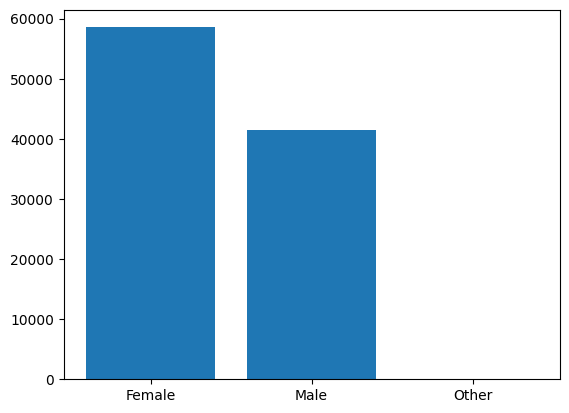

In [51]:
plt.bar(x=data['gender'].value_counts().index , height=data['gender'].value_counts().values)

([<matplotlib.patches.Wedge at 0x21d5ece6f90>,
 [Text(-0.2919933647221339, 1.060537540569992, '58552'),
  Text(0.2913936774432974, -1.0607024675874341, '41430'),
  Text(1.0999998242165692, -0.0006218709811560653, '18')],
 [Text(-0.15926910803025485, 0.5784750221290864, '58.55'),
  Text(0.1589420058781622, -0.5785649823204185, '41.43'),
  Text(0.5999999041181285, -0.0003392023533578538, '0.02')])

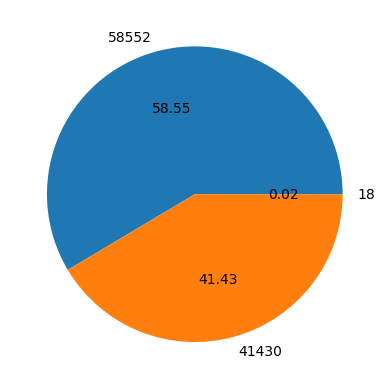

In [52]:
plt.pie(data['gender'].value_counts(),labels=data['gender'].value_counts(),autopct='%.2f')

In [53]:
group=data.groupby(["gender","diabetes"])['gender'].count()

([<matplotlib.patches.Wedge at 0x21d5ecefd90>,
 [Text(-0.14098594544356355, 1.0909275700922518, ''),
  Text(-1.0143661040041407, -0.42551311031208094, ''),
  Text(0.15482036910742725, -1.0890503447083795, ''),
  Text(1.0909983165104473, -0.14043743579035475, ''),
  Text(1.099999824187456, -0.0006219224758637048, '')],
 [Text(-0.07690142478739828, 0.5950514018685009, '54.09'),
  Text(-0.5532906021840767, -0.23209806017022594, '4.46'),
  Text(0.08444747405859666, -0.5940274607500251, '37.39'),
  Text(0.5950899908238803, -0.07660223770382986, '4.04'),
  Text(0.5999999041022487, -0.0003392304413802026, '0.02')])

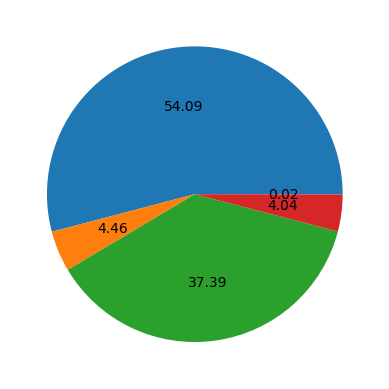

In [54]:
plt.pie(x=group.values,autopct="%.2f")

In [55]:
data['smoking_history'].unique()

array(['never', 'not current', 'current', 'No Info', 'ever', 'former'],
      dtype=object)

In [56]:
data(lambda 'never' if smoking_history=='No info'  elif smoking_history=='former')

SyntaxError: invalid syntax (1557885337.py, line 1)

In [57]:
data['smoking_history'].unique()

array(['never', 'not current', 'current', 'No Info', 'ever', 'former'],
      dtype=object)

In [59]:
data['smoking_history']=data['smoking_history'].replace({'former':'ever','No info':'never','current':'never'})

In [60]:
data['smoking_history'].unique()

array(['never', 'not current', 'No Info', 'ever'], dtype=object)

In [73]:
data.groupby(['smoking_history','diabetes','gender'])['diabetes'].value_counts()


smoking_history  diabetes  gender  diabetes
No Info          0         Female  0           18946
                           Male    0           15410
                           Other   0               6
                 1         Female  1             754
                           Male    1             700
ever             0         Female  0            6152
                           Male    0            5141
                           Other   0               1
                 1         Female  1             860
                           Male    1            1202
never            0         Female  0           25474
                           Male    0           14610
                           Other   0               3
                 1         Female  1            2453
                           Male    1            1841
not current      0         Female  0            3519
                           Male    0            2230
                           Other   0               8
  

In [74]:
data.groupby(['gender'])['age'].mean()

gender
Female    42.463291
Male      41.075139
Other     29.555556
Name: age, dtype: float64

In [77]:
data[data.diabetes==1].groupby("gender")['age'].mean()

gender
Female    60.993499
Male      60.894776
Name: age, dtype: float64

In [78]:
data[data.diabetes==0].groupby("gender")['age'].mean()

gender
Female    40.935065
Male      38.934209
Other     29.555556
Name: age, dtype: float64

In [80]:
data[data.diabetes==0].groupby("gender")['bmi'].mean()

gender
Female    27.022526
Male      26.691107
Other     27.379444
Name: bmi, dtype: float64

In [81]:
data['bmi'].unique()

array([27.32, 19.95, 23.76, ..., 59.91, 50.8 , 10.34])

In [102]:
data['category'] = ['good bmi' if 27 <= bmi <= 30 else 'not good bmi' for bmi in data['bmi']]
data['category'].value_counts()

not good bmi    62845
good bmi        37155
Name: category, dtype: int64

In [103]:
data[data.diabetes==0].groupby("gender")['category'].value_counts()

gender  category    
Female  not good bmi    35016
        good bmi        19075
Male    not good bmi    22023
        good bmi        15368
Other   not good bmi       11
        good bmi            7
Name: category, dtype: int64